<a href="https://colab.research.google.com/github/ricagodoy/EEG-DL/blob/master/C%C3%B3pia_de_Grasp_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testing pre-processing approaches

In [ ]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [ ]:
# df = pd.read_csv("00_largediameter.csv")
# df

df = pd.read_csv("with_objects_landmarks.csv")
df

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,handedness,gesture
0,-0.028609,0.040521,0.078826,0.002390,0.044044,0.048148,0.025887,0.040923,0.027249,0.044491,...,-0.024287,0.032899,0.012993,-0.036069,0.041313,0.027808,-0.038027,0.050433,left,00_largediameter
1,-0.028192,0.039844,0.079681,0.002413,0.045222,0.044198,0.025387,0.045594,0.021136,0.046584,...,-0.023899,0.036151,0.017716,-0.034012,0.043976,0.035095,-0.036339,0.052272,left,00_largediameter
2,-0.031232,0.044174,0.080888,0.001923,0.049105,0.047584,0.026657,0.049057,0.023769,0.049830,...,-0.028025,0.035847,0.016885,-0.040714,0.042882,0.032873,-0.044275,0.051039,left,00_largediameter
3,-0.041005,0.039850,0.069411,-0.005488,0.036086,0.053057,0.013827,0.022058,0.042438,0.017081,...,-0.024153,0.013498,-0.003537,-0.040799,0.022390,0.009906,-0.050650,0.033228,left,00_largediameter
4,-0.050392,0.062934,0.045910,-0.054785,0.036301,0.024608,-0.054106,0.018181,-0.000049,-0.046266,...,0.025096,-0.008107,0.044084,0.021334,-0.021978,0.049582,0.018675,-0.035990,left,00_largediameter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.060441,0.030126,0.075817,0.024138,0.041457,0.055958,-0.000837,0.046682,0.038728,-0.034731,...,-0.025486,0.023856,-0.000171,-0.019338,0.046634,0.003706,-0.016626,0.054150,multi,29_palmar
696,0.068601,0.046065,-0.002575,0.060156,0.010521,-0.015233,0.046796,-0.024867,-0.023406,0.034502,...,0.030433,-0.014007,0.000608,0.033127,-0.032202,0.017479,0.036449,-0.027910,multi,29_palmar
697,0.072787,0.045449,0.005421,0.063749,0.014130,-0.014795,0.052793,-0.018084,-0.026408,0.041459,...,0.030478,-0.010080,-0.001721,0.036460,-0.036423,0.020572,0.039365,-0.035536,multi,29_palmar
698,0.070582,0.035122,-0.029256,0.058202,-0.000592,-0.039724,0.039109,-0.038058,-0.043767,0.021624,...,0.032288,-0.015023,-0.001655,0.034696,-0.036696,0.014414,0.038521,-0.030850,multi,29_palmar


Function to visualize a datapoint:

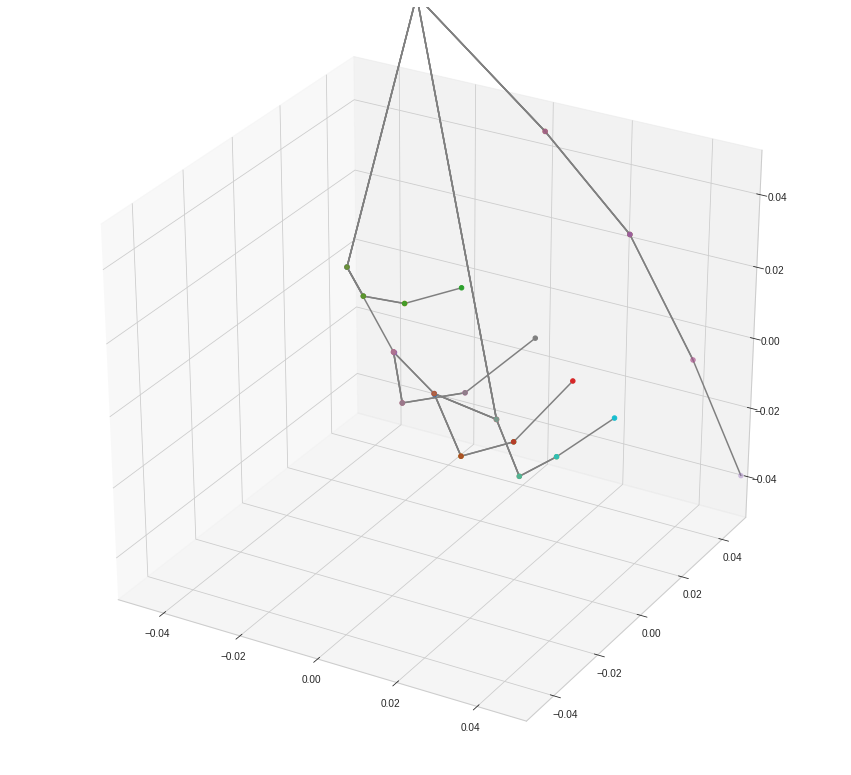

In [ ]:
plt.style.use('seaborn-whitegrid')
def plot_datapoint(ax, row):
    lines = [
        ["WRIST", "THUMB_CMC", "THUMB_MCP", "THUMB_IP", "THUMB_TIP"],
        [
            "WRIST",
            "INDEX_FINGER_MCP",
            "INDEX_FINGER_PIP",
            "INDEX_FINGER_DIP",
            "INDEX_FINGER_TIP",
        ],
        [
            "MIDDLE_FINGER_MCP",
            "MIDDLE_FINGER_PIP",
            "MIDDLE_FINGER_DIP",
            "MIDDLE_FINGER_TIP",
        ],
        [
            "RING_FINGER_MCP",
            "RING_FINGER_PIP",
            "RING_FINGER_DIP",
            "RING_FINGER_TIP",
        ],
        ["WRIST", "PINKY_MCP", "PINKY_PIP", "PINKY_DIP", "PINKY_TIP"],
        [
            "INDEX_FINGER_MCP",
            "MIDDLE_FINGER_MCP",
            "RING_FINGER_MCP",
            "PINKY_MCP",
        ]
    ]

    for line in lines:
        zline = []
        xline = []
        yline = []
        for landmark in line:
            xline.append(row[f"{landmark}_X"])
            yline.append(row[f"{landmark}_Y"])
            zline.append(row[f"{landmark}_Z"])
            ax.plot3D(xline, yline, zline, "gray")
            ax.scatter3D(xline, yline, zline, cmap="Greens")

fig = plt.figure(figsize=(15, 14))
ax = fig.add_subplot(projection="3d")
ax.set_xlim(-0.05, 0.05)
ax.set_ylim(-0.05, 0.05)
ax.set_zlim(-0.05, 0.05)
plot_datapoint(ax, df.iloc[0])

Setting wrist as origin:


In [ ]:
processed_df = df.copy()
processed_df = processed_df.drop(["handedness", "gesture"], axis=1)

def to_numpy_array(row, landmark_name):
  return np.array([row[f"{landmark_name}_X"], row[f"{landmark_name}_Y"], row[f"{landmark_name}_Z"]])

def set_offset(row):
  wrist_pos = to_numpy_array(row, "WRIST")
  wrist_as_row = np.tile(wrist_pos, [21, 1]).reshape(-1)
  return row - wrist_as_row

processed_df = processed_df.apply(set_offset, axis=1)
processed_df

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.0,0.0,0.0,0.030999,0.003524,-0.030678,0.054496,0.000403,-0.051577,0.073100,...,-0.046885,0.024446,-0.064808,-0.045927,0.041602,-0.076590,-0.037513,0.056417,-0.078547,-0.028394
1,0.0,0.0,0.0,0.030605,0.005378,-0.035482,0.053579,0.005750,-0.058544,0.074776,...,-0.041717,0.027760,-0.063743,-0.043530,0.045908,-0.073857,-0.035704,0.063287,-0.076184,-0.027408
2,0.0,0.0,0.0,0.033155,0.004931,-0.033304,0.057888,0.004883,-0.057120,0.081062,...,-0.044040,0.030063,-0.072199,-0.045042,0.048117,-0.084888,-0.038007,0.064105,-0.088449,-0.029850
3,0.0,0.0,0.0,0.035517,-0.003765,-0.016354,0.054831,-0.017792,-0.026973,0.058086,...,-0.056208,0.025829,-0.064003,-0.055913,0.037468,-0.080649,-0.047021,0.050911,-0.090500,-0.036183
4,0.0,0.0,0.0,-0.004393,-0.026632,-0.021303,-0.003715,-0.044753,-0.045959,0.004126,...,-0.045669,0.081589,-0.037838,-0.054018,0.094476,-0.041600,-0.067889,0.099974,-0.044259,-0.081900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,-0.036303,0.011331,-0.019858,-0.061278,0.016556,-0.037089,-0.095173,...,-0.059112,-0.057808,-0.055613,-0.051961,-0.060612,-0.049465,-0.029182,-0.056736,-0.046753,-0.021666
696,0.0,0.0,0.0,-0.008445,-0.035543,-0.012659,-0.021805,-0.070932,-0.020832,-0.034099,...,0.002742,-0.076500,-0.015632,-0.011433,-0.067993,-0.012938,-0.029627,-0.051122,-0.009615,-0.025336
697,0.0,0.0,0.0,-0.009038,-0.031319,-0.020217,-0.019994,-0.063533,-0.031829,-0.031328,...,0.003088,-0.083020,-0.014971,-0.015501,-0.074508,-0.008989,-0.041844,-0.052215,-0.006084,-0.040957
698,0.0,0.0,0.0,-0.012380,-0.035714,-0.010469,-0.031473,-0.073180,-0.014511,-0.048958,...,0.029935,-0.077867,-0.002834,0.014233,-0.072237,-0.000426,-0.007441,-0.056168,0.003399,-0.001594


Normalizing by distance between WRIST and PINKY_MCP:

In [ ]:
def normalize(row):
  norm = np.linalg.norm(to_numpy_array(row, "PINKY_MCP") - to_numpy_array(row, "WRIST"))
  return row/norm

processed_df = processed_df.apply(normalize, axis=1)
row = processed_df.iloc[0]
print(f'This should be 1: {np.linalg.norm(to_numpy_array(row, "PINKY_MCP") - to_numpy_array(row, "WRIST"))}')
processed_df

This should be 1: 1.0


,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.0,0.0,0.0,0.431714,0.049074,-0.427251,0.758957,0.005608,-0.718311,1.018060,...,-0.652961,0.340462,-0.902568,-0.639618,0.579380,-1.066660,-0.522442,0.785710,-1.093919,-0.395433
1,0.0,0.0,0.0,0.437007,0.076792,-0.506645,0.765048,0.082102,-0.835941,1.067715,...,-0.595662,0.396381,-0.910174,-0.621551,0.655507,-1.054581,-0.509813,0.903666,-1.087809,-0.391355
2,0.0,0.0,0.0,0.434257,0.064584,-0.436214,0.758212,0.063957,-0.748146,1.061730,...,-0.576830,0.393763,-0.945649,-0.589948,0.630225,-1.111848,-0.497803,0.839632,-1.158488,-0.390967
3,0.0,0.0,0.0,0.463870,-0.049167,-0.213599,0.716130,-0.232373,-0.352281,0.758636,...,-0.734116,0.337342,-0.835918,-0.730252,0.489353,-1.053326,-0.614121,0.664928,-1.181982,-0.472568
4,0.0,0.0,0.0,-0.053767,-0.325950,-0.260721,-0.045465,-0.547723,-0.562485,0.050496,...,-0.558933,0.998549,-0.463093,-0.661115,1.156273,-0.509130,-0.830878,1.223565,-0.541677,-1.002365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,-0.399709,0.124758,-0.218647,-0.674693,0.182282,-0.408360,-1.047884,...,-0.650843,-0.636482,-0.612316,-0.572103,-0.667363,-0.544624,-0.321308,-0.624680,-0.514761,-0.238553
696,0.0,0.0,0.0,-0.125958,-0.530109,-0.188801,-0.325208,-1.057913,-0.310695,-0.508566,...,0.040895,-1.140960,-0.233143,-0.170515,-1.014079,-0.192961,-0.441874,-0.762455,-0.143409,-0.377873
697,0.0,0.0,0.0,-0.121976,-0.422682,-0.272842,-0.269843,-0.857445,-0.429567,-0.422803,...,0.041675,-1.120436,-0.202044,-0.209201,-1.005556,-0.121311,-0.564729,-0.704697,-0.082107,-0.552758
698,0.0,0.0,0.0,-0.172550,-0.497780,-0.145912,-0.438679,-1.019992,-0.202263,-0.682383,...,0.417233,-1.085327,-0.039506,0.198378,-1.006856,-0.005934,-0.103707,-0.782874,0.047379,-0.022215


In [ ]:
# fig = plt.figure(figsize=(15, 14))
# ax = fig.add_subplot(projection="3d")
# ax.set_xlim(-1.05, 1.05)
# ax.set_ylim(-1.05, 1.05)
# ax.set_zlim(-1.05, 1.05)
# plot_datapoint(ax, processed_df.iloc[0])

Finding transform to align vector $\overrightarrow{WRISTPINKY\_MCP}$ to $\overrightarrow{Z}$ and the palm normal to $\overrightarrow{X}$:

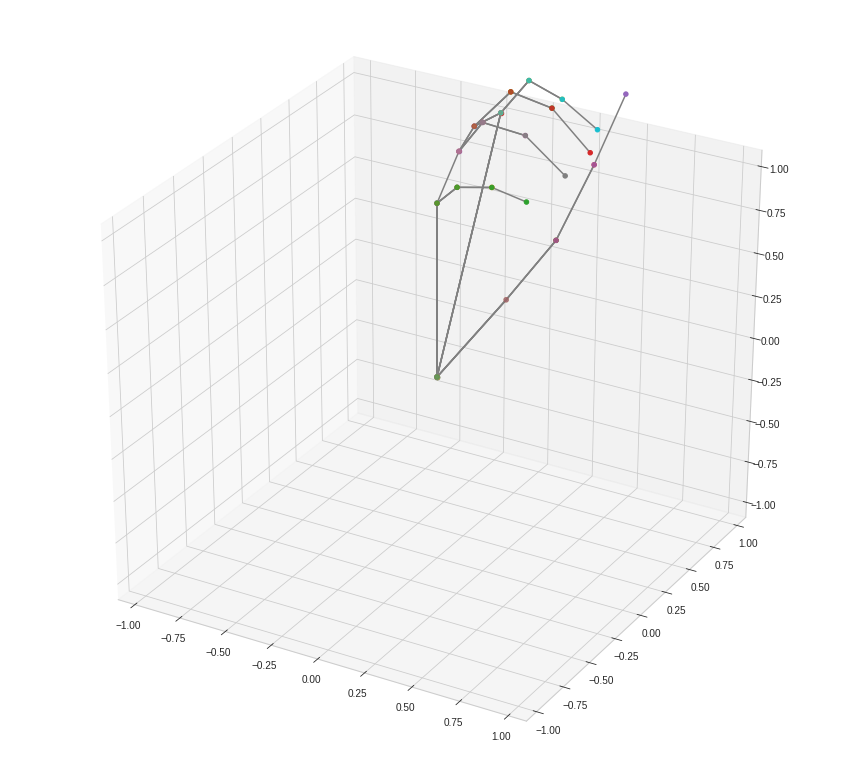

In [ ]:
def align(row):

    landmark_names = [
        "WRIST",
        "THUMB_CMC",
        "THUMB_MCP",
        "THUMB_IP",
        "THUMB_TIP",
        "INDEX_FINGER_MCP",
        "INDEX_FINGER_PIP",
        "INDEX_FINGER_DIP",
        "INDEX_FINGER_TIP",
        "MIDDLE_FINGER_MCP",
        "MIDDLE_FINGER_PIP",
        "MIDDLE_FINGER_DIP",
        "MIDDLE_FINGER_TIP",
        "RING_FINGER_MCP",
        "RING_FINGER_PIP",
        "RING_FINGER_DIP",
        "RING_FINGER_TIP",
        "PINKY_MCP",
        "PINKY_PIP",
        "PINKY_DIP",
        "PINKY_TIP",
    ]

    wrist_pinky_v = to_numpy_array(row, "PINKY_MCP") - to_numpy_array(
        row, "WRIST"
    )
    wrist_index_v = to_numpy_array(row, "INDEX_FINGER_MCP") - to_numpy_array(
        row, "WRIST"
    )
    palm_normal = np.cross(wrist_pinky_v, wrist_index_v)

    T_mat = np.eye(4)
    T_mat[:3, :3] = np.c_[
        palm_normal, np.cross(palm_normal, wrist_pinky_v), wrist_pinky_v
    ]
    # T_mat = np.linalg.inv(T_mat)
    dict_row = {}
    for name in landmark_names:
        # Adding 1 for homogeneous transform
        landmark_value = np.r_[to_numpy_array(row, name), [1]]
        transformed_value = np.matmul(landmark_value, T_mat)
        dict_row[f"{name}_X"] = transformed_value[0]
        dict_row[f"{name}_Y"] = transformed_value[1]
        dict_row[f"{name}_Z"] = transformed_value[2]

    return pd.Series(dict_row)

processed_df = processed_df.apply(align, axis=1)
fig = plt.figure(figsize=(15, 14))
ax = fig.add_subplot(projection="3d")
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_zlim(-1.05, 1.05)
plot_datapoint(ax, processed_df.iloc[0])

## Converting 3D landmark position to joint angles

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt

from gesture_utils import (
    align,
    set_offset,
    normalize,
    rotate_180,
    get_hand_joint_angles,
)

# mypath = "."
# data = pd.DataFrame()
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# for file_name in onlyfiles:
#     if file_name.endswith(".csv"):
#         gesture_name = file_name.split(".")[0]
#         df = pd.read_csv(join(mypath, file_name))
#         df["gesture"] = gesture_name
#         data = pd.concat([data, df], axis=0)
# data = data.reset_index(drop=True)
# data

mypath = "."
data = pd.DataFrame()
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file_name in onlyfiles:
    if file_name.endswith(".csv"):
        # gesture_name = file_name.split(".")[0].split("_")[1]
        df = pd.read_csv(join(mypath, file_name))
        # df["gesture"] = gesture_name
        data = pd.concat([data, df], axis=0)
data = data.reset_index(drop=True)
data

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,handedness,gesture
0,-0.028609,0.040521,0.078826,0.002390,0.044044,0.048148,0.025887,0.040923,0.027249,0.044491,...,-0.024287,0.032899,0.012993,-0.036069,0.041313,0.027808,-0.038027,0.050433,left,00_largediameter
1,-0.028192,0.039844,0.079681,0.002413,0.045222,0.044198,0.025387,0.045594,0.021136,0.046584,...,-0.023899,0.036151,0.017716,-0.034012,0.043976,0.035095,-0.036339,0.052272,left,00_largediameter
2,-0.031232,0.044174,0.080888,0.001923,0.049105,0.047584,0.026657,0.049057,0.023769,0.049830,...,-0.028025,0.035847,0.016885,-0.040714,0.042882,0.032873,-0.044275,0.051039,left,00_largediameter
3,-0.041005,0.039850,0.069411,-0.005488,0.036086,0.053057,0.013827,0.022058,0.042438,0.017081,...,-0.024153,0.013498,-0.003537,-0.040799,0.022390,0.009906,-0.050650,0.033228,left,00_largediameter
4,-0.050392,0.062934,0.045910,-0.054785,0.036301,0.024608,-0.054106,0.018181,-0.000049,-0.046266,...,0.025096,-0.008107,0.044084,0.021334,-0.021978,0.049582,0.018675,-0.035990,left,00_largediameter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.046392,0.071311,0.038509,-0.055334,0.034568,0.014411,-0.050295,0.004796,0.001757,-0.036781,...,0.033685,-0.022085,0.001266,0.040363,-0.027011,-0.003320,0.043094,-0.014141,left,34_push
1396,-0.045973,0.071140,0.038095,-0.055005,0.034558,0.014160,-0.050399,0.004409,0.002127,-0.036605,...,0.033963,-0.021872,0.001156,0.040362,-0.026877,-0.003371,0.043454,-0.014082,left,34_push
1397,-0.046462,0.071243,0.038428,-0.055367,0.034527,0.014244,-0.050396,0.004472,0.001589,-0.036978,...,0.033704,-0.021457,0.001772,0.040472,-0.026594,-0.003231,0.043412,-0.013901,left,34_push
1398,-0.046043,0.070678,0.037219,-0.054856,0.034098,0.013779,-0.049836,0.003978,0.001915,-0.036276,...,0.033290,-0.022222,0.001779,0.039409,-0.027465,-0.003323,0.042549,-0.015005,left,34_push


In [ ]:
angle_data = pd.DataFrame()
for i, sample in data.iterrows():
  # sample = data.loc[1]
  hand_type = sample["handedness"]
  gesture = sample["gesture"]
  sample
  sample = sample.drop(["handedness", "gesture"])

  sample = set_offset(sample)
  sample = normalize(sample)
  sample = align(sample)

  if hand_type == "left":
      sample = rotate_180(sample)

  joint_angles = get_hand_joint_angles(
      sample,
      hand_type == "left",
      # f"{hand_type}_hand",
  )
  # joint_angles = sample # comment this for angle
  joint_angles["gesture"] = gesture
  joint_angles["handedness"] = hand_type
  angle_series = pd.Series(joint_angles).sort_index()
  # angle_series = joint_angles # coment this for angle
  # angle_series
  angle_data = pd.concat([angle_data, angle_series.to_frame().T], axis=0)
angle_data = angle_data.reset_index(drop=True)


In [ ]:
data = angle_data

In [ ]:
# angle_data.to_csv("angles.csv", header=True, index=False)

## Transforming and analysing the data before classification

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt

Loading all the csv files and merging them into one

In [ ]:
# mypath = "."
# data = pd.DataFrame()
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# for file_name in onlyfiles:
#     if file_name.endswith(".csv"):
#         gesture_name = file_name.split(".")[0].split("_")[1]
#         df = pd.read_csv(join(mypath, file_name))
#         df["gesture"] = gesture_name
#         data = pd.concat([data, df], axis=0)
# data = data.reset_index(drop=True)
# data

# descoment for landmark
mypath = "."
data = pd.DataFrame()
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file_name in onlyfiles:
    if file_name.endswith(".csv"):
        # gesture_name = file_name.split(".")[0].split("_")[1]
        df = pd.read_csv(join(mypath, file_name))
        # df["gesture"] = gesture_name
        data = pd.concat([data, df], axis=0)
data = data.reset_index(drop=True)
data

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,handedness,gesture
0,-0.028609,0.040521,0.078826,0.002390,0.044044,0.048148,0.025887,0.040923,0.027249,0.044491,...,-0.024287,0.032899,0.012993,-0.036069,0.041313,0.027808,-0.038027,0.050433,left,00_largediameter
1,-0.028192,0.039844,0.079681,0.002413,0.045222,0.044198,0.025387,0.045594,0.021136,0.046584,...,-0.023899,0.036151,0.017716,-0.034012,0.043976,0.035095,-0.036339,0.052272,left,00_largediameter
2,-0.031232,0.044174,0.080888,0.001923,0.049105,0.047584,0.026657,0.049057,0.023769,0.049830,...,-0.028025,0.035847,0.016885,-0.040714,0.042882,0.032873,-0.044275,0.051039,left,00_largediameter
3,-0.041005,0.039850,0.069411,-0.005488,0.036086,0.053057,0.013827,0.022058,0.042438,0.017081,...,-0.024153,0.013498,-0.003537,-0.040799,0.022390,0.009906,-0.050650,0.033228,left,00_largediameter
4,-0.050392,0.062934,0.045910,-0.054785,0.036301,0.024608,-0.054106,0.018181,-0.000049,-0.046266,...,0.025096,-0.008107,0.044084,0.021334,-0.021978,0.049582,0.018675,-0.035990,left,00_largediameter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.046392,0.071311,0.038509,-0.055334,0.034568,0.014411,-0.050295,0.004796,0.001757,-0.036781,...,0.033685,-0.022085,0.001266,0.040363,-0.027011,-0.003320,0.043094,-0.014141,left,34_push
1396,-0.045973,0.071140,0.038095,-0.055005,0.034558,0.014160,-0.050399,0.004409,0.002127,-0.036605,...,0.033963,-0.021872,0.001156,0.040362,-0.026877,-0.003371,0.043454,-0.014082,left,34_push
1397,-0.046462,0.071243,0.038428,-0.055367,0.034527,0.014244,-0.050396,0.004472,0.001589,-0.036978,...,0.033704,-0.021457,0.001772,0.040472,-0.026594,-0.003231,0.043412,-0.013901,left,34_push
1398,-0.046043,0.070678,0.037219,-0.054856,0.034098,0.013779,-0.049836,0.003978,0.001915,-0.036276,...,0.033290,-0.022222,0.001779,0.039409,-0.027465,-0.003323,0.042549,-0.015005,left,34_push


Position pre-processing:

In [ ]:
from sklearn import preprocessing

# data = data.query("gesture != '19_writingtripod'")
# Split into dependent/independent variables
X = data.drop(["handedness","gesture"], axis=1)
# hand = data["handedness"]
y = data[["gesture"]]

# Applying pre-processing routines
# descoment for landmark
X = X.apply(set_offset, axis=1)
X = X.apply(normalize, axis=1)
X = X.apply(align, axis=1)
X = X.drop(["WRIST_X","WRIST_Y", "WRIST_Z"], axis=1)
# # le = preprocessing.LabelEncoder()
# hand = le.fit_transform(hand)
# X["handedness"] = hand
X

,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,THUMB_IP_Y,THUMB_IP_Z,THUMB_TIP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.312400,-0.162368,0.542943,0.473725,-0.303821,0.968487,0.645065,-0.367788,1.474261,0.761649,...,1.124824,-0.387087,-0.130523,1.263168,-0.492672,-0.349253,1.326450,-0.502869,-0.534451,1.290338
1,0.401817,-0.217560,0.625256,0.627084,-0.396091,1.073836,0.880280,-0.519002,1.635595,1.013945,...,1.128473,-0.506299,-0.136747,1.298612,-0.658709,-0.391181,1.366354,-0.708333,-0.639512,1.358730
2,0.349752,-0.200016,0.533349,0.562215,-0.354516,0.947587,0.775173,-0.457319,1.491578,0.937963,...,1.091397,-0.461039,-0.136173,1.263170,-0.597538,-0.356351,1.363827,-0.643182,-0.557746,1.369503
3,0.184050,-0.068240,0.421136,0.223274,-0.144100,0.753154,0.147706,-0.126768,1.154394,0.112250,...,1.064320,-0.173263,-0.089013,1.216580,-0.193196,-0.235517,1.307609,-0.168492,-0.370879,1.340660
4,0.156811,-0.105489,0.343608,0.224913,-0.232523,0.672091,0.234570,-0.386051,1.101275,0.184038,...,1.000653,-0.350084,0.044686,1.254171,-0.427574,0.009879,1.469807,-0.467085,-0.058552,1.626187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.274620,-0.155483,0.438186,0.411149,-0.169898,0.833942,0.404806,-0.248017,1.257750,0.237758,...,0.988702,-0.389424,-0.160701,1.158736,-0.301242,-0.294761,1.006146,-0.257964,-0.208401,0.872517
1396,0.276649,-0.154018,0.437523,0.420196,-0.163075,0.832241,0.411497,-0.236608,1.255343,0.231011,...,0.987395,-0.395532,-0.162888,1.150983,-0.299675,-0.298693,0.998611,-0.259579,-0.212470,0.862302
1397,0.274822,-0.153967,0.437441,0.413492,-0.167284,0.834665,0.411422,-0.239075,1.253999,0.244596,...,0.988084,-0.390006,-0.158157,1.153665,-0.302512,-0.292447,1.002216,-0.258589,-0.209414,0.865406
1398,0.276944,-0.155724,0.437179,0.418898,-0.165653,0.836024,0.412820,-0.239022,1.257364,0.233077,...,0.986780,-0.399393,-0.160749,1.160195,-0.306165,-0.297702,1.011620,-0.261147,-0.215821,0.872710


Angles pre-processing:

In [ ]:
# angle_data = angle_data.query("gesture != '19_writingtripod'")
# # Split into dependent/independent variables
# X = angle_data.drop(["handedness","gesture"], axis=1)
# y = angle_data[["gesture"]]

#descoment for angle
# X = X/np.pi
# X

Checking class distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

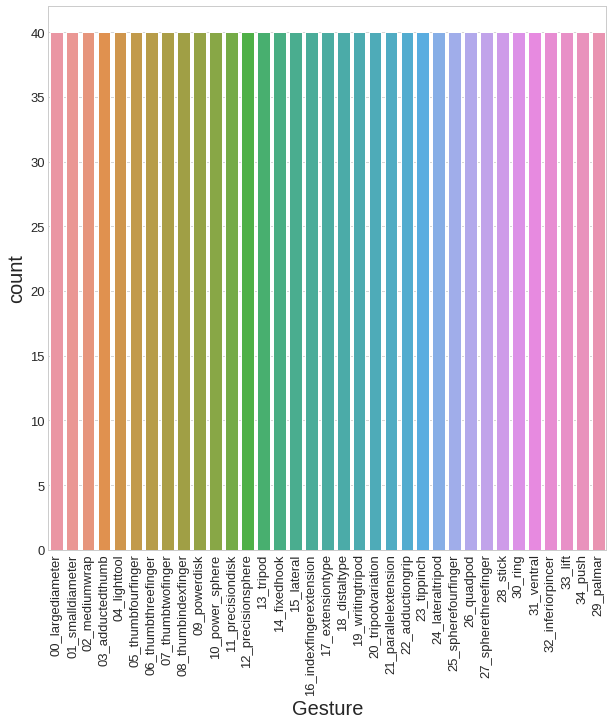

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

# ax = sns.countplot(x="gesture",data=angle_data, ax=ax)
ax = sns.countplot(x="gesture",data=y, ax=ax)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(13)
ax.set_xlabel('Gesture', fontsize=20)
ax.set_ylabel('count', fontsize=20)
plt.xticks(rotation=90)


### Evaluating classifiers

Helper functions:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

def precision_none(y_test, y_pred):
  return precision_score(y_test, y_pred, average=None, zero_division=0)

def evaluate_models(models, scores, confusion_matrices, X, y, labels, metric=accuracy_score, train_scores = None):
  skf = StratifiedKFold(n_splits=10)
  split_no = 1
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index].ravel(), y.values[test_index].ravel()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.fit_transform(X_test)
    print(f"### Split {split_no} ###")
    split_no += 1
    for model_name, model in models.items():
      print(f"Fitting model: {model_name}")
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      if model_name not in scores:
        scores[model_name] = []
      scores[model_name].append(metric(y_test, y_pred))
      if train_scores is not None:
        if model_name not in train_scores:
          train_scores[model_name] = []
        train_scores[model_name].append(metric(y_train, model.predict(X_train)))
      if model_name not in confusion_matrices:
        # no_of_classes = y.unique().shape[0]
        no_of_classes = pd.unique(y["gesture"]).shape[0]
        confusion_matrices[model_name] = np.zeros((no_of_classes, no_of_classes))
      c_mat = confusion_matrix(y_test, y_pred, labels=labels)
      confusion_matrices[model_name] += c_mat

def plot_metrics(scores):
  accs = {
      "model_name": [],
      "scores": []
  }


  for model_name, scores_list in scores.items():
    accs["model_name"] += [model_name] * len(scores_list)
    accs["scores"] += scores_list

  df = pd.DataFrame.from_dict(accs)

  sns.set_style("darkgrid")
  fig = plt.figure(figsize=(20, 15))
  ax = fig.add_subplot()
  sns.barplot(x="model_name", y="scores", data=df, ax = ax, ci=95)
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)
  ax.set_xlabel('Model', fontsize=20)
  ax.set_ylabel('Accuracy', fontsize=20)
  plt.xticks(rotation=90)

def plot_precision(model_precisions, model_name, labels):
  precisions = {
      "labels": [],
      "scores": []
  }
  for fold in model_precisions[model_name]:
    for label, value in zip(labels, fold):
      precisions["labels"].append(label)
      precisions["scores"].append(value)

  df = pd.DataFrame.from_dict(precisions)
  sns.set_style("darkgrid")
  fig = plt.figure(figsize=(20, 15))
  ax = fig.add_subplot()
  sns.barplot(x="labels", y="scores", data=df, ax = ax, ci=95)
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)
  ax.set_xlabel('Classes', fontsize=20)
  ax.set_ylabel('Score', fontsize=20)
  ax.set_title(f"Precision for model: {model_name}", fontsize=20)
  plt.xticks(rotation=90)

def plot_conf_mat(conf_mat, labels):
  fig = plt.figure(figsize=(20, 15))
  ax = fig.add_subplot()
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)
  ax.set_xlabel('', fontsize=20)
  ax.set_ylabel('', fontsize=20)
  sns.heatmap(conf_mat,annot=True, ax=ax, xticklabels=labels,
              yticklabels=labels)

In [ ]:
# # Deleting umbalanced classes:
# #data_balanced = data.query("gesture != 'writingtripod' and gesture!='ring' and gesture!='adductiongrip' and gesture!='adduction' and gesture!='adductedthumn' and gesture!='distaltype' and gesture!='indexfinger' and gesture!='lateraltripod' and gesture!='lighttool' and gesture!='palmar' and gesture!='powerdisk' and gesture!='quadpod' and gesture!='spherethreefinger' and gesture!='spherefourfinger' and gesture!='stick' and gesture!='tripodvariation' and gesture!='ventral' and gesture!='push' and gesture!= 'lift' and gesture!= 'indexfingerextension' and gesture!= 'indexfingerextension' and gesture!= 'lateral'  and gesture!= 'power'")
# data_balanced = data.query("gesture != 'writingtripod'")
# #gesture != 'push' and

# # Split into dependent/independent variables
# X = data_balanced.drop(["handedness","gesture"], axis=1)
# y = data_balanced[["gesture"]]

# # Applying pre-processing routines
# # X = X.apply(set_offset, axis=1)
# # X = X.apply(normalize, axis=1)
# # X = X.apply(align, axis=1)
# X = scaler.fit_transform(X)

# # We drop wrist since it will be always at origin:
# # X = X.drop(["WRIST_X","WRIST_Y", "WRIST_Z"], axis=1)

# y

In [ ]:
# labels = y.unique().tolist()
labels = pd.unique(y["gesture"]).tolist()
print(len(labels))
labels

35


['00_largediameter',
 '01_smalldiameter',
 '02_mediumwrap',
 '03_adductedthumb',
 '04_lighttool',
 '05_thumbfourfinger',
 '06_thumbthreefinger',
 '07_thumbtwofinger',
 '08_thumbindexfinger',
 '09_powerdisk',
 '10_power_sphere',
 '11_precisiondisk',
 '12_precisionsphere',
 '13_tripod',
 '14_fixedhook',
 '15_lateral',
 '16_indexfingerextension',
 '17_extensiontype',
 '18_distaltype',
 '19_writingtripod',
 '20_tripodvariation',
 '21_parallelextension',
 '22_adductiongrip',
 '23_tippinch',
 '24_lateraltripod',
 '25_spherefourfinger',
 '26_quadpod',
 '27_spherethreefinger',
 '28_stick',
 '30_ring',
 '31_ventral',
 '32_inferiorpincer',
 '33_lift',
 '34_push',
 '29_palmar']

In [ ]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import ensemble

models = {
    "knn_1": KNeighborsClassifier(n_neighbors=1),
    "knn_3": KNeighborsClassifier(n_neighbors=3),
    "knn_5": KNeighborsClassifier(n_neighbors=5),
    "knn_7": KNeighborsClassifier(n_neighbors=7),
    "RF_100": RandomForestClassifier(n_estimators=100),
    "RF_150": RandomForestClassifier(n_estimators=150),
    "RF_200": RandomForestClassifier(n_estimators=200),
    "RF_250": RandomForestClassifier(n_estimators=250),
    "SVM default": svm.SVC(),
    "SVM poly 3": svm.SVC(kernel="poly", degree = 3),
    "SVM poly 5": svm.SVC(kernel="poly", degree = 5),
    "SVM poly 7": svm.SVC(kernel="poly", degree = 7),
    "SVM rbf": svm.SVC(kernel="rbf"),
    "SVM sigmoid": svm.SVC(kernel="sigmoid"),
    "DT Gini": DecisionTreeClassifier(criterion = "gini"),
    "DT Entropy": DecisionTreeClassifier(criterion = "entropy"),
    "GradBoost default": GradientBoostingClassifier(n_estimators=100, max_leaf_nodes= 4, max_depth= None, random_state = 2, min_samples_split= 5),
    "GradBoost No shrinkage": GradientBoostingClassifier(n_estimators=100, max_leaf_nodes= 4, max_depth= None, random_state = 2, min_samples_split= 5, learning_rate = 1.0, subsample= 1.0),
    "GradBoost learning_rate=0.2": GradientBoostingClassifier(n_estimators=100, max_leaf_nodes= 4, max_depth= None, random_state = 2, min_samples_split= 5, learning_rate = 0.2, subsample= 1.0),
    "GradBoost subsample=0.5": GradientBoostingClassifier(n_estimators=100, max_leaf_nodes= 4, max_depth= None, random_state = 2, min_samples_split= 5, learning_rate = 1.0, subsample= 0.5),
    "GradBoost learning_rate=0.2, subsample=0.5": GradientBoostingClassifier(n_estimators=100, max_leaf_nodes= 4, max_depth= None, random_state = 2, min_samples_split= 5, learning_rate = 0.2, subsample= 0.5),
    "GradBoost learning_rate=0.2, max_features=2": GradientBoostingClassifier(n_estimators=100, max_leaf_nodes= 4, max_depth= None, random_state = 2, min_samples_split= 5, learning_rate = 0.2, max_features= 2),
    "MLP x50 relu": MLPClassifier(activation = "relu", hidden_layer_sizes = (50,), max_iter = 500),
    "MLP x100 relu": MLPClassifier(activation = "relu", hidden_layer_sizes = (100,), max_iter = 500),
    "MLP x150 relu": MLPClassifier(activation = "relu", hidden_layer_sizes = (100,), max_iter = 500),
    "MLP x50 logistic": MLPClassifier(activation = "logistic", hidden_layer_sizes = (50,), max_iter = 500),
    "MLP x100 logistic": MLPClassifier(activation = "logistic", hidden_layer_sizes = (100,), max_iter = 500),
    "MLP x150 logistic": MLPClassifier(activation = "logistic", hidden_layer_sizes = (100,), max_iter = 500)
}

scores = {}
confusion_matrices = {}

evaluate_models(models, scores, confusion_matrices, X, y, labels, metric=accuracy_score)

### Split 1 ###
Fitting model: knn_1
Fitting model: knn_3
Fitting model: knn_5
Fitting model: knn_7
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: SVM default
Fitting model: SVM poly 3
Fitting model: SVM poly 5
Fitting model: SVM poly 7
Fitting model: SVM rbf
Fitting model: SVM sigmoid
Fitting model: DT Gini
Fitting model: DT Entropy
### Split 2 ###
Fitting model: knn_1
Fitting model: knn_3
Fitting model: knn_5
Fitting model: knn_7
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: SVM default
Fitting model: SVM poly 3
Fitting model: SVM poly 5
Fitting model: SVM poly 7
Fitting model: SVM rbf
Fitting model: SVM sigmoid
Fitting model: DT Gini
Fitting model: DT Entropy
### Split 3 ###
Fitting model: knn_1
Fitting model: knn_3
Fitting model: knn_5
Fitting model: knn_7
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: SVM default
F

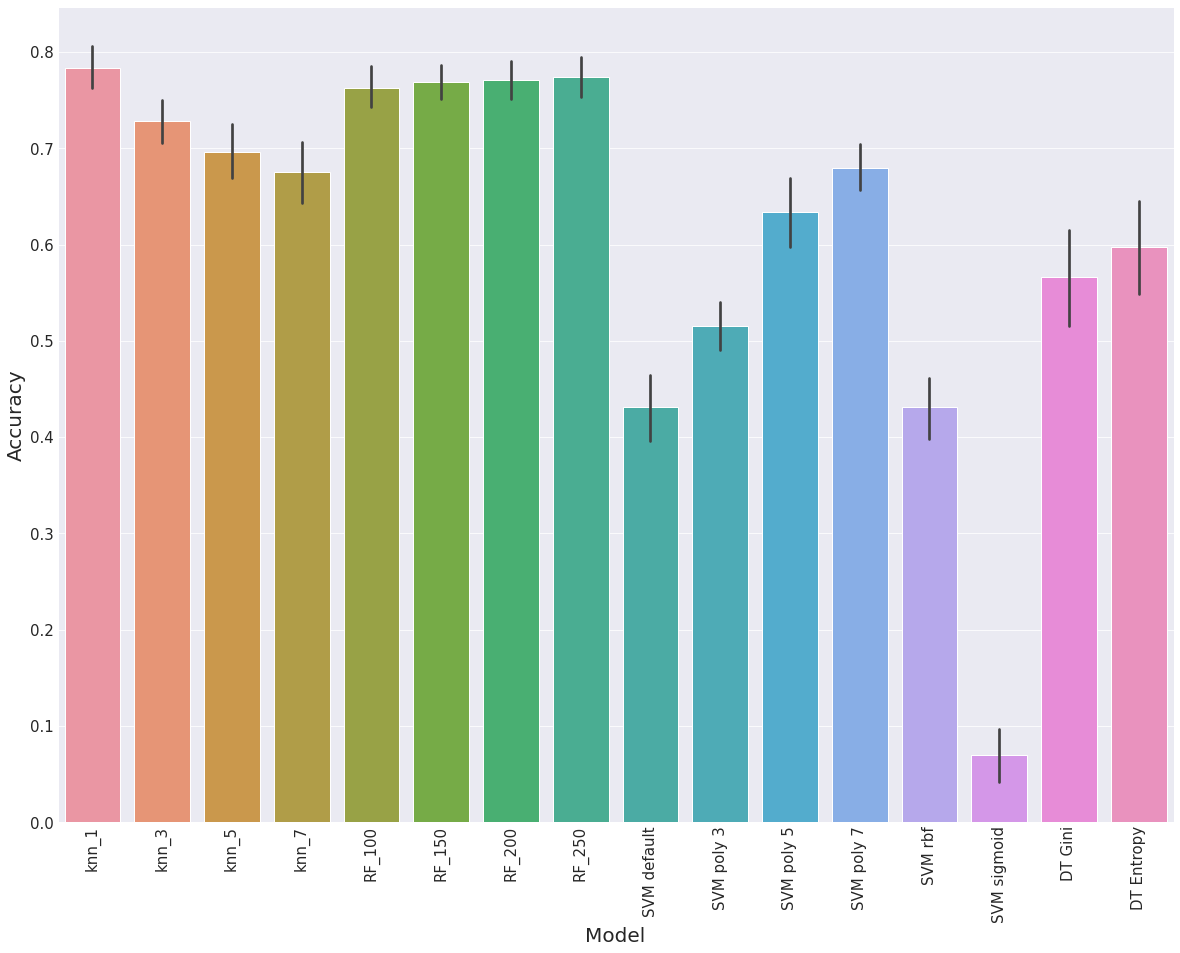

In [ ]:
plot_metrics(scores)

In [ ]:
# Getting 5 best models:
model_scores = {"model_name":[], "scores": []}
for name, m_scores in scores.items():
  model_scores["model_name"].append(name)
  model_scores["scores"].append(np.mean(m_scores))
df = pd.DataFrame.from_dict(model_scores)
best_model_names = df["scores"].sort_values()[-5:].index
best_model_names = list(df.loc[best_model_names]["model_name"])
print(f"Best models: {best_model_names}")
best_models = {model_name: models[model_name] for model_name in best_model_names}

Best models: ['RF_100', 'RF_150', 'RF_200', 'RF_250', 'knn_1']


In [ ]:
# Generating metrics again for best models:
best_scores = {}
best_scores_train = {}
best_confusion_matrices = {}
evaluate_models(best_models, best_scores, best_confusion_matrices, X, y, labels, metric=accuracy_score, train_scores = best_scores_train)

### Split 1 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 2 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 3 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 4 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 5 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 6 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 7 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 8 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1


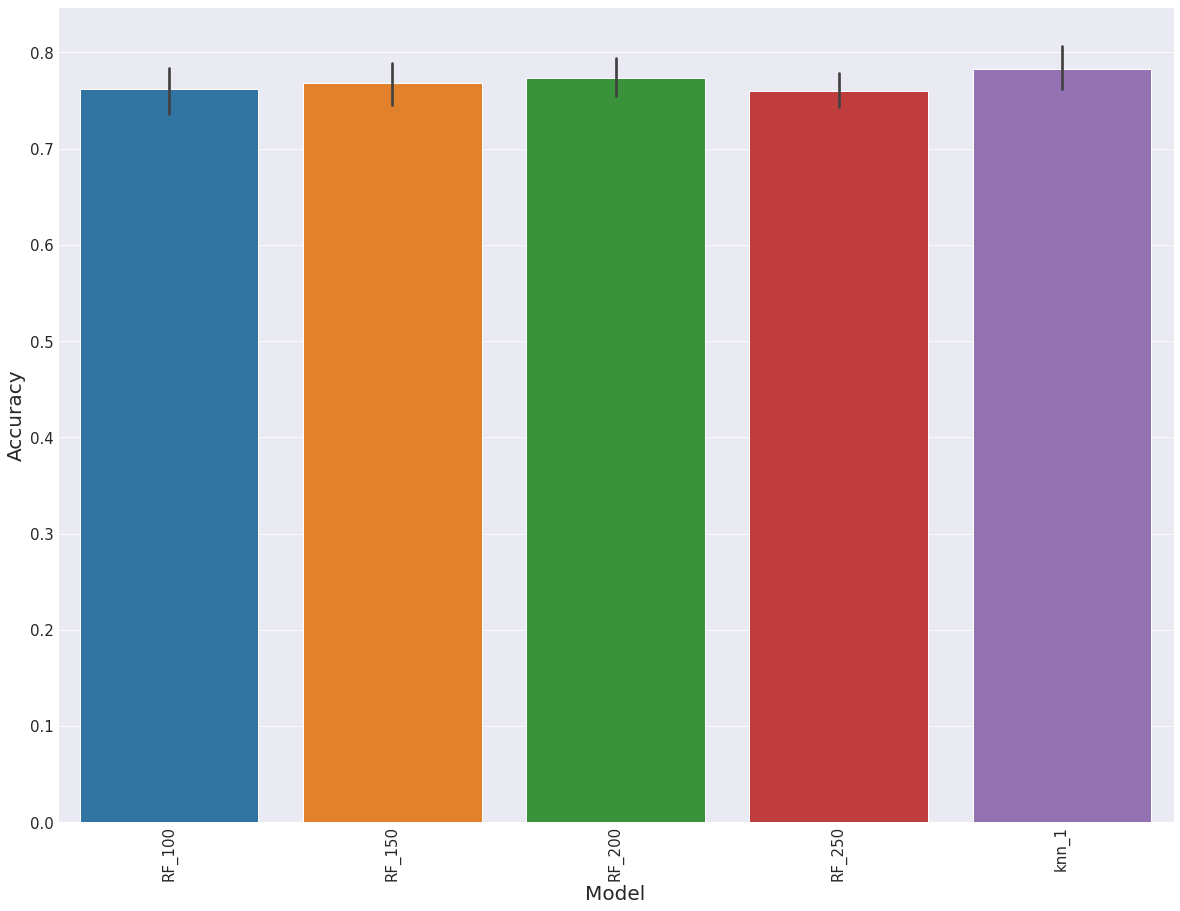

In [ ]:
plot_metrics(best_scores)

In [ ]:
best_scores_prec = {}
best_confusion_matrices_prec = {}
evaluate_models(best_models, best_scores_prec, best_confusion_matrices_prec, X, y, labels, metric=precision_none)

### Split 1 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 2 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 3 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 4 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 5 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 6 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 7 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1
### Split 8 ###
Fitting model: RF_100
Fitting model: RF_150
Fitting model: RF_200
Fitting model: RF_250
Fitting model: knn_1


In [ ]:
# df = plot_precision(best_scores_prec,"RF_250", labels)

In [ ]:
# models2 = {
#     "knn_1": KNeighborsClassifier(n_neighbors=1),
#     "knn_3": KNeighborsClassifier(n_neighbors=3),
#     "knn_5": KNeighborsClassifier(n_neighbors=5),
#     "knn_7": KNeighborsClassifier(n_neighbors=7),
#     "RF_100": RandomForestClassifier(n_estimators=100),
#     "RF_150": RandomForestClassifier(n_estimators=150),
#     "RF_200": RandomForestClassifier(n_estimators=200),
#     "RF_250": RandomForestClassifier(n_estimators=250),
#     "SVM default": svm.SVC(),
#     "SVM poly 3": svm.SVC(kernel="poly", degree = 3),
#     "SVM poly 5": svm.SVC(kernel="poly", degree = 5),
#     "SVM poly 7": svm.SVC(kernel="poly", degree = 7),
#     "SVM poly 9": svm.SVC(kernel="poly", degree = 9),
#     "SVM poly 11": svm.SVC(kernel="poly", degree = 11),
#     "SVM poly 13": svm.SVC(kernel="poly", degree = 13),
#     "SVM poly 15": svm.SVC(kernel="poly", degree = 15),
#     "SVM rbf": svm.SVC(kernel="rbf"),
#     "SVM sigmoid": svm.SVC(kernel="sigmoid"),
#     "DT Gini": DecisionTreeClassifier(criterion = "gini"),
#     "DT Entropy": DecisionTreeClassifier(criterion = "entropy"),
#     "MLP x50 relu": MLPClassifier(activation = "relu", hidden_layer_sizes = (50,), max_iter = 500),
#     "MLP x100 relu": MLPClassifier(activation = "relu", hidden_layer_sizes = (100,), max_iter = 500),
#     "MLP x150 relu": MLPClassifier(activation = "relu", hidden_layer_sizes = (100,), max_iter = 500),
#     "MLP x50 logistic": MLPClassifier(activation = "logistic", hidden_layer_sizes = (50,), max_iter = 500),
#     "MLP x100 logistic": MLPClassifier(activation = "logistic", hidden_layer_sizes = (100,), max_iter = 500),
#     "MLP x150 logistic": MLPClassifier(activation = "logistic", hidden_layer_sizes = (100,), max_iter = 500)
# }
# scores2 = {}
# confusion_matrices2 = {}

# evaluate_models(models2, scores2, confusion_matrices2, X, y, labels, metric=accuracy_score)

In [ ]:
# accs = {
#     "model_name": [],
#     "scores": []
# }

# for model_name, scores_list in scores2.items():
#   accs["model_name"] += [model_name] * len(scores_list)
#   accs["scores"] += scores_list

# df = pd.DataFrame.from_dict(accs)

# sns.set_style("darkgrid")
# fig = plt.figure(figsize=(20, 15))
# ax = fig.add_subplot()
# sns.barplot(x="model_name", y="scores", data=df, ax = ax)
# plt.xticks(rotation=45)

Analysing the top 3 models' precisions

In [ ]:
# best_models = {
#     "RF_250": RandomForestClassifier(n_estimators=250)
# }
# best_scores = {}
# best_confusion_matrices = {}

# evaluate_models(best_models, best_scores, best_confusion_matrices, X, y, labels, metric=precision_none)

In [ ]:
# accs = {
#     "model_name": [],
#     "scores": []
# }

# for model_name, best_score_list in best_scores.items():
#   for label, value in zip(labels, np.array(best_scores["RF_250"]).mean(axis=0)):
#     accs["model_name"] += [label]
#     accs["scores"] += [value]

# df = pd.DataFrame.from_dict(accs)

# sns.set_style("darkgrid")
# fig = plt.figure(figsize=(20, 15))
# ax = fig.add_subplot()
# sns.barplot(x="model_name", y="scores", data=df, ax = ax)
# for label in (ax.get_xticklabels() + ax.get_yticklabels()):
# 	label.set_fontsize(15)
# ax.set_xlabel('RF 250 trees', fontsize=20)
# ax.set_ylabel('Score', fontsize=20)
# plt.xticks(rotation=75)



In [ ]:
for model_name, score_list in scores.items():
  print(f"Mean accuracy for model '{model_name}': {np.mean(score_list)}")

Mean accuracy for model 'knn_1': 0.7828571428571428
Mean accuracy for model 'knn_3': 0.7285714285714285
Mean accuracy for model 'knn_5': 0.6964285714285714
Mean accuracy for model 'knn_7': 0.6757142857142857
Mean accuracy for model 'RF_100': 0.7628571428571428
Mean accuracy for model 'RF_150': 0.7685714285714285
Mean accuracy for model 'RF_200': 0.7707142857142857
Mean accuracy for model 'RF_250': 0.7735714285714286
Mean accuracy for model 'SVM default': 0.4314285714285714
Mean accuracy for model 'SVM poly 3': 0.5149999999999999
Mean accuracy for model 'SVM poly 5': 0.6335714285714287
Mean accuracy for model 'SVM poly 7': 0.6792857142857143
Mean accuracy for model 'SVM rbf': 0.4314285714285714
Mean accuracy for model 'SVM sigmoid': 0.06999999999999999
Mean accuracy for model 'DT Gini': 0.5664285714285715
Mean accuracy for model 'DT Entropy': 0.5971428571428572


In [ ]:
best_scores
for model_name, score_list in best_scores.items():
  print(f"Mean accuracy for model '{model_name}': {np.mean(score_list)}")

Mean accuracy for model 'RF_100': 0.7621428571428571
Mean accuracy for model 'RF_150': 0.7685714285714285
Mean accuracy for model 'RF_200': 0.7735714285714285
Mean accuracy for model 'RF_250': 0.76
Mean accuracy for model 'knn_1': 0.7828571428571428


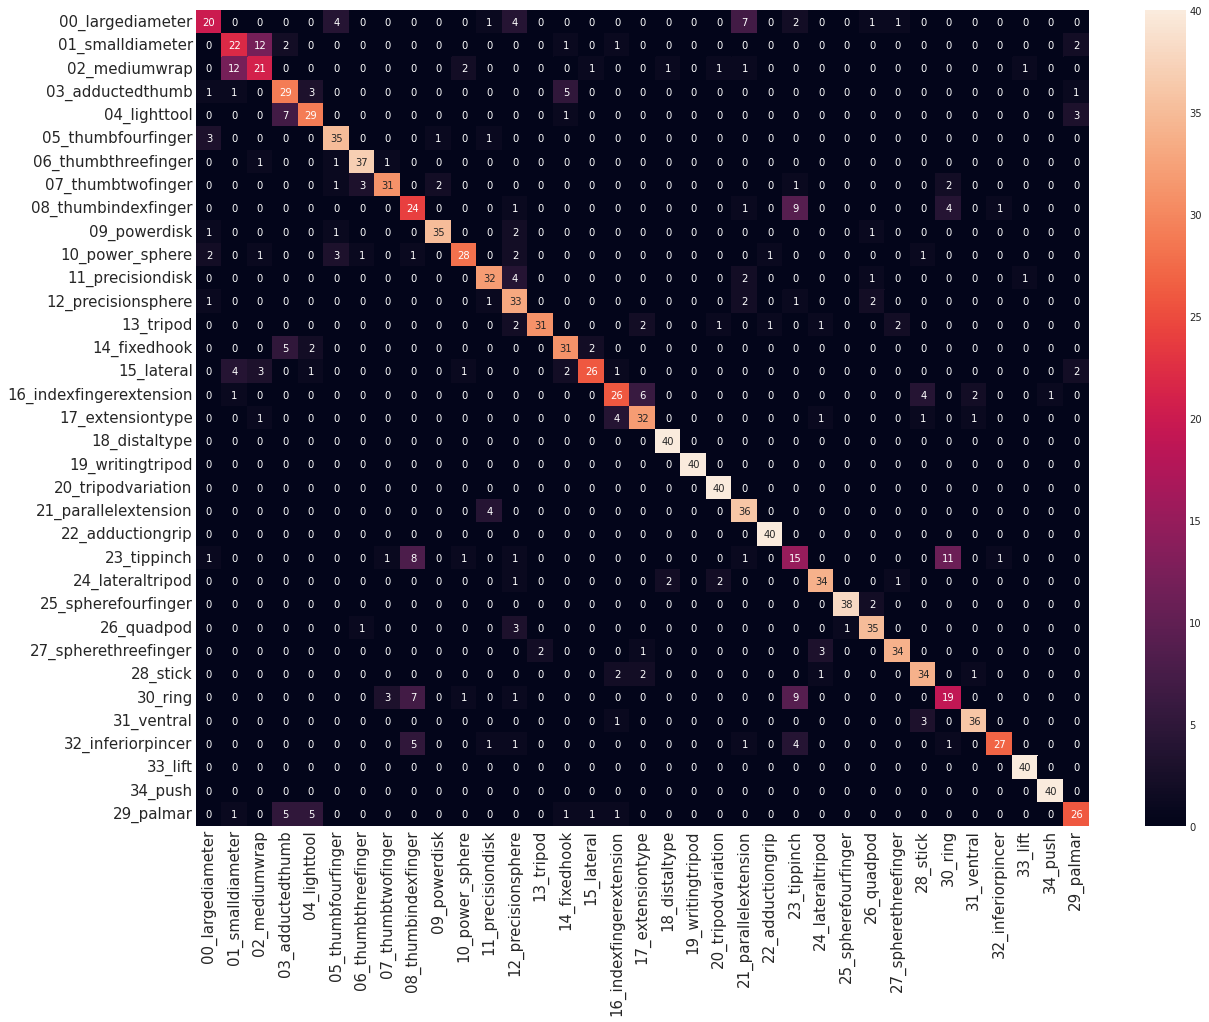

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(15)
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('', fontsize=20)
sns.heatmap(confusion_matrices["knn_1"],annot=True, ax=ax, xticklabels=labels,
            yticklabels=labels)


## Training and saving best model

In [ ]:
import pickle

# Training using the whole data:
best_model = KNeighborsClassifier(n_neighbors=1)
best_model.fit(X.values, np.ravel(y.values))

pickle.dump(best_model, open('angles_knn1.sav', 'wb'))


In [ ]:
# To load latter on:
best_model_loaded = pickle.load(open('trained_model.sav', 'rb'))

# Just checking if load was successfull:
best_model_loaded.score(X.values, y.values)

FileNotFoundError: ignored

In [ ]:
import pickle

# Training using the whole data:
best_model = RandomForestClassifier(n_estimators=250)
best_model.fit(X.values, y.values)

pickle.dump(best_model, open('small_trained_model.sav', 'wb'))

# To load latter on:
best_model_loaded = pickle.load(open('small_trained_model.sav', 'rb'))

# Just checking if load was successfull:
best_model_loaded.score(X.values, y.values)